In [ ]:
import numpy as np
import scanpy as sc
import infercnvpy as cnv
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
adata = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.preprocessed.NanoMnT.ManualAnnot.Epi.h5ad')

In [42]:
adata.obs.columns

Index(['doublet_score', 'predicted_doublet', 'SampleID', 'PatientID',
       'BiopsySite', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'Identifier',
       'Author_CellType_lvl_1', 'Author_CellType_lvl_2', 'n_genes', 'leiden',
       'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci', 'MSI', 'BiopsySite2',
       'Manual_CellType_lvl_1'],
      dtype='object')

## Conventional clutstering using transcriptome

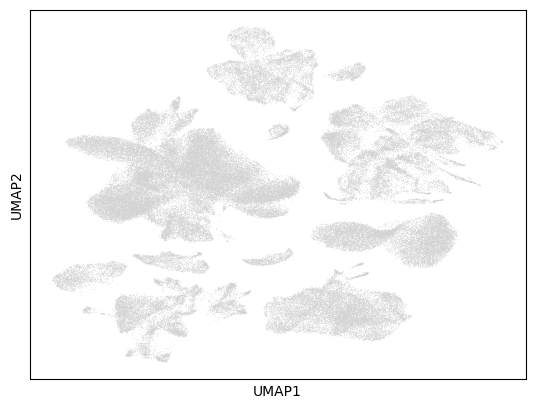

In [134]:
sc.pl.umap(adata, color=['MSI', 'BiopsySite', 'PatientID',], ncols=2,)

## Transcriptome clustering + STR profile

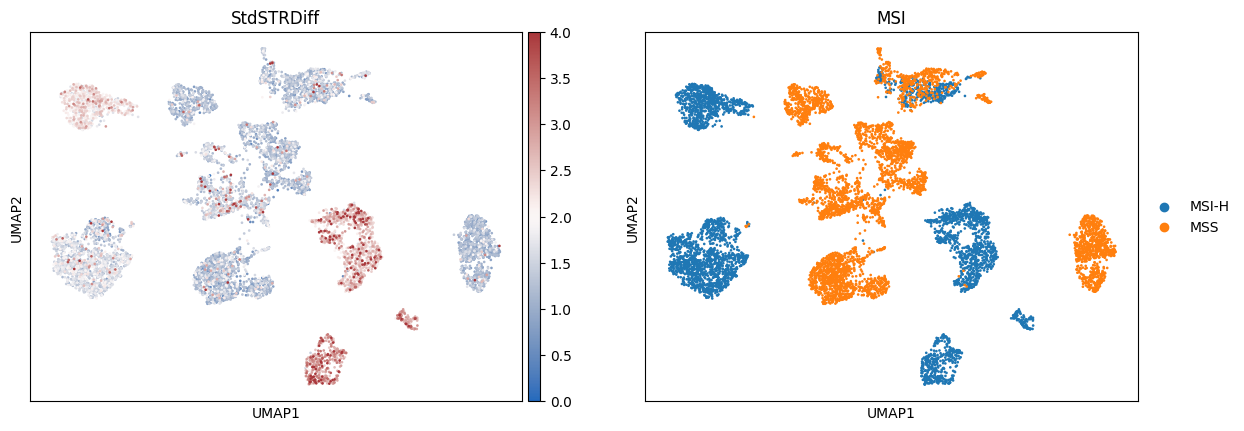

In [61]:
sc.pl.umap(adata[adata.obs['NumSTRLoci']>=10], color=['StdSTRDiff', 'MSI',], 
           ncols=2, vmin=0, vmax=4, cmap='vlag')

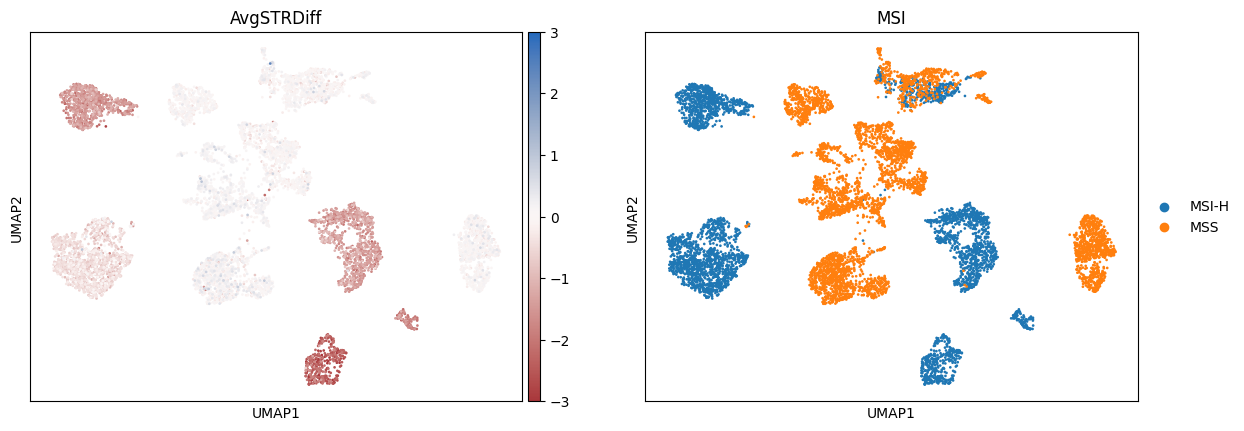

In [63]:
sc.pl.umap(adata[adata.obs['NumSTRLoci']>=10], color=['AvgSTRDiff', 'MSI',], 
           ncols=2, vmin=-3, vmax=3, cmap='vlag_r')

## CNV-based analyses

In [73]:
adata = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.preprocessed.NanoMnT.ManualAnnot.h5ad')

In [74]:
adata = adata.raw.to_adata()

In [75]:
cnv.io.genomic_position_from_gtf('/home/shared/cellranger_reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf', adata)

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'gene_type', 'gene_name', 'level', 'hgnc_id', 'tag', 'havana_gene', 'transcript_id', 'transcript_version', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'exon_version', 'protein_id', 'ccdsid', 'ont']


In [76]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    reference_key="Author_CellType_lvl_1",
    reference_cat=['B',
                    'Entericglial',
                    'Mast',
                    'McDC',
                    'Neutrophils',
                    'PlasmaB',
                    'T_NK',
                    'pDC',
                    ],
    window_size=250,
)

  0%|          | 0/23 [00:00<?, ?it/s]

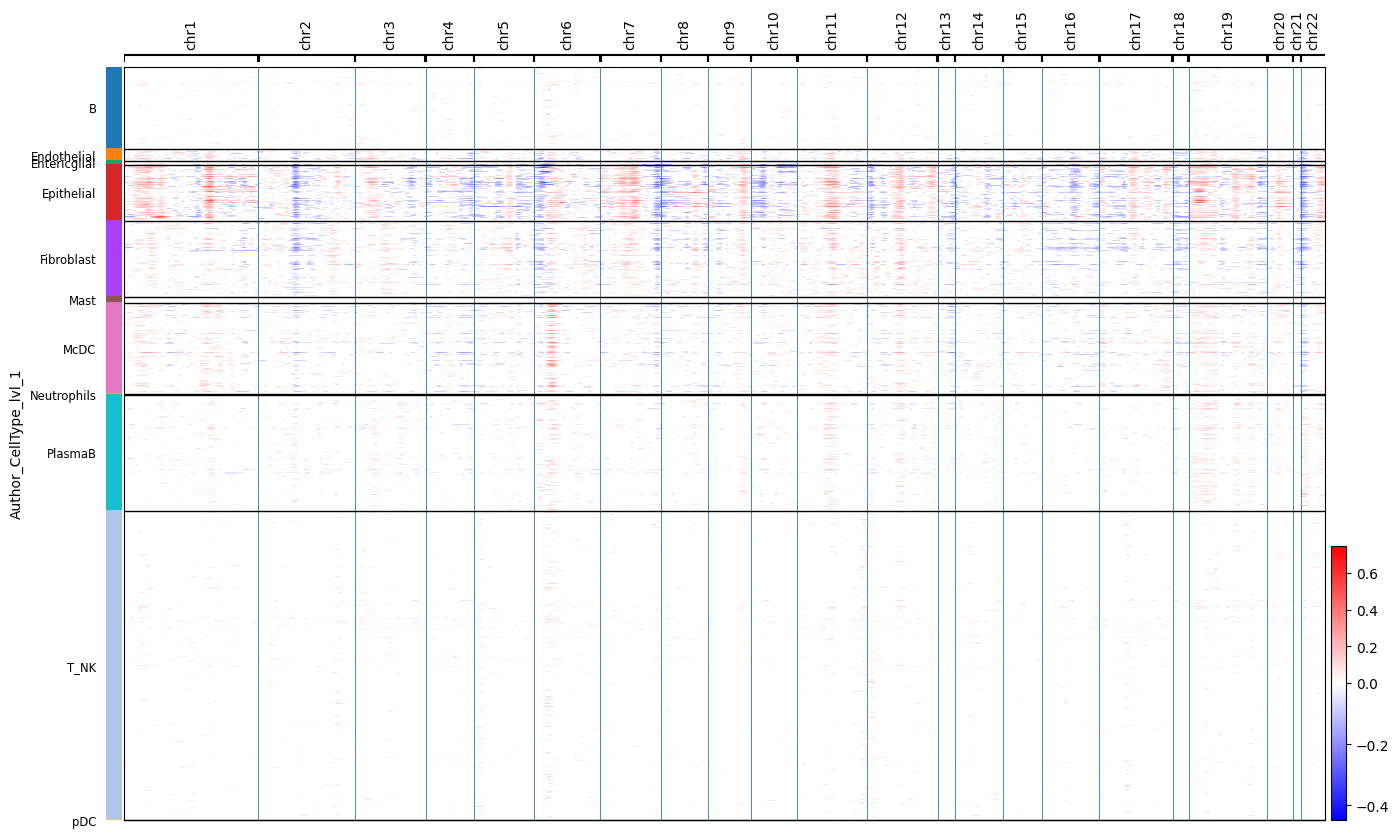

In [77]:
cnv.pl.chromosome_heatmap(adata, groupby="Author_CellType_lvl_1")

In [78]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

2024-12-31 11:42:23.135957: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-31 11:42:23.137460: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 11:42:23.142698: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 11:42:23.159746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-31 11:42:23.187418: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 2315 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


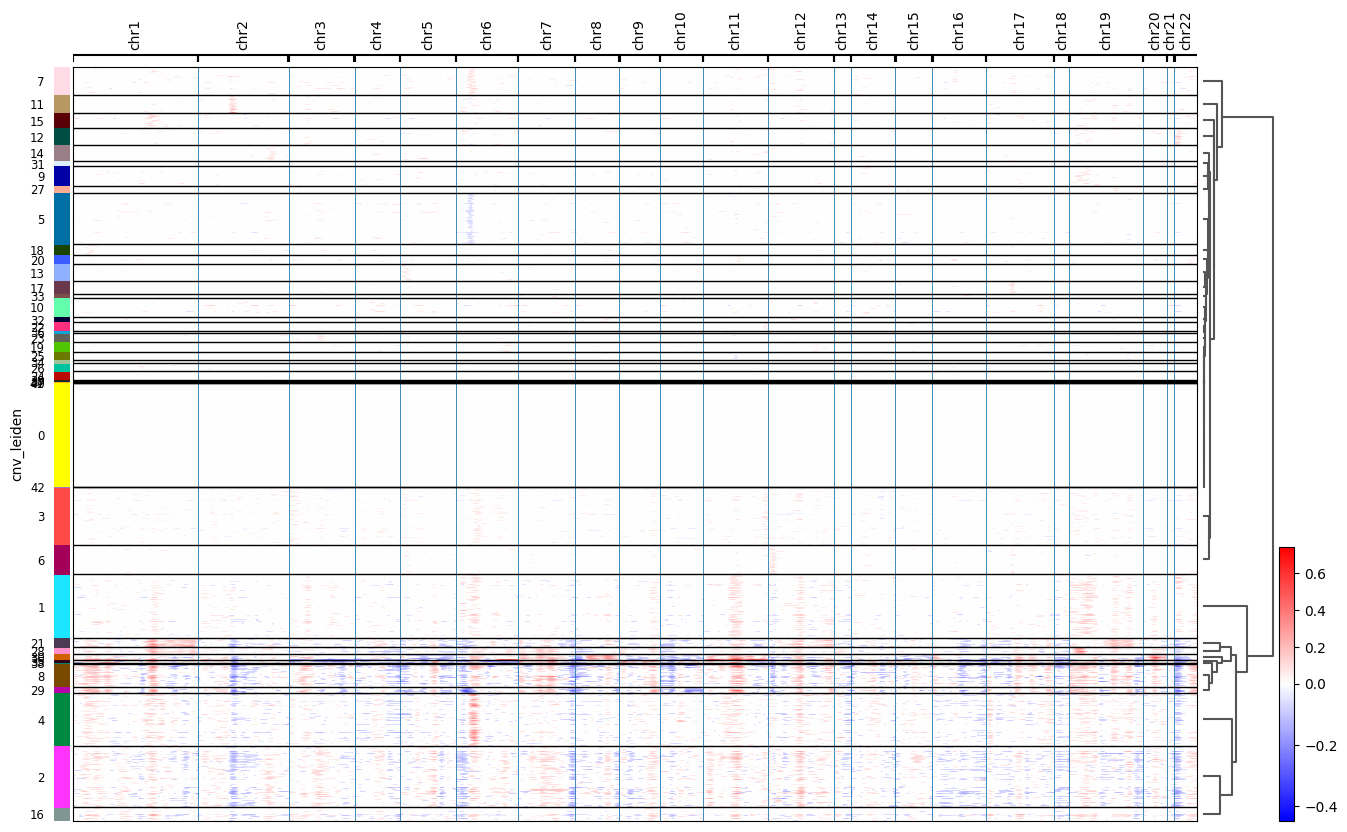

In [79]:
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True)

/tmp/ipykernel_112482/3867782873.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = adata.obs.groupby(["cnv_leiden"])['cnv_score'].aggregate(np.median).reset_index().sort_values('cnv_score')
/tmp/ipykernel_112482/3867782873.py:2: FutureWarning: The provided callable <function median at 0x7ff5a875e160> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = adata.obs.groupby(["cnv_leiden"])['cnv_score'].aggregate(np.median).reset_index().sort_values('cnv_score')
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type bef

<Axes: xlabel='cnv_score', ylabel='cnv_leiden'>

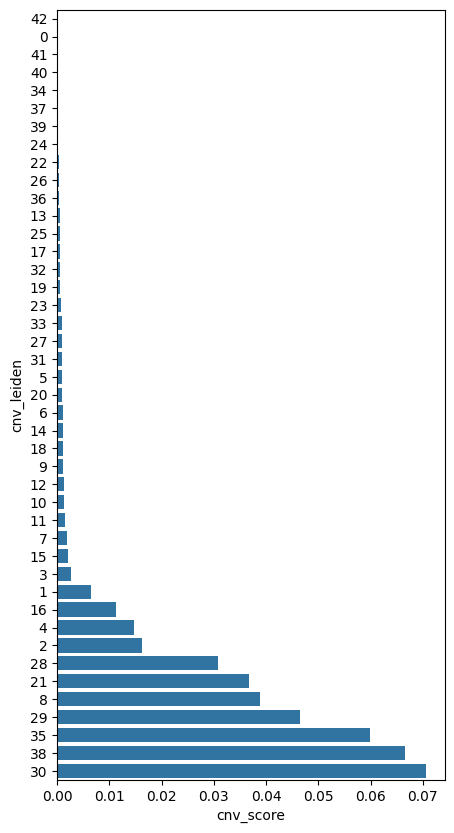

In [120]:
plt.figure(figsize=(5, 10))
result = adata.obs.groupby(["cnv_leiden"])['cnv_score'].aggregate(np.median).reset_index().sort_values('cnv_score')
sns.barplot(data=adata.obs, y='cnv_leiden', x='cnv_score', order=result['cnv_leiden'])

In [123]:
dict_cnvLeiden_to_Tumor = {
    '30' : 'Tumor',
    '38' : 'Tumor',
    '35' : 'Tumor',
    '29' : 'Tumor',
    '8' : 'Tumor',
    '21' : 'Tumor',
    '28' : 'Tumor',
}

for cnvLeiden in set(adata.obs['cnv_leiden']):
    try: dict_cnvLeiden_to_Tumor[cnvLeiden]
    except KeyError: dict_cnvLeiden_to_Tumor[cnvLeiden] = 'Normal'
    
adata.obs['Manual_CellType_CNV'] = [ dict_cnvLeiden_to_Tumor[cnvLeiden] for cnvLeiden in adata.obs['cnv_leiden'] ]

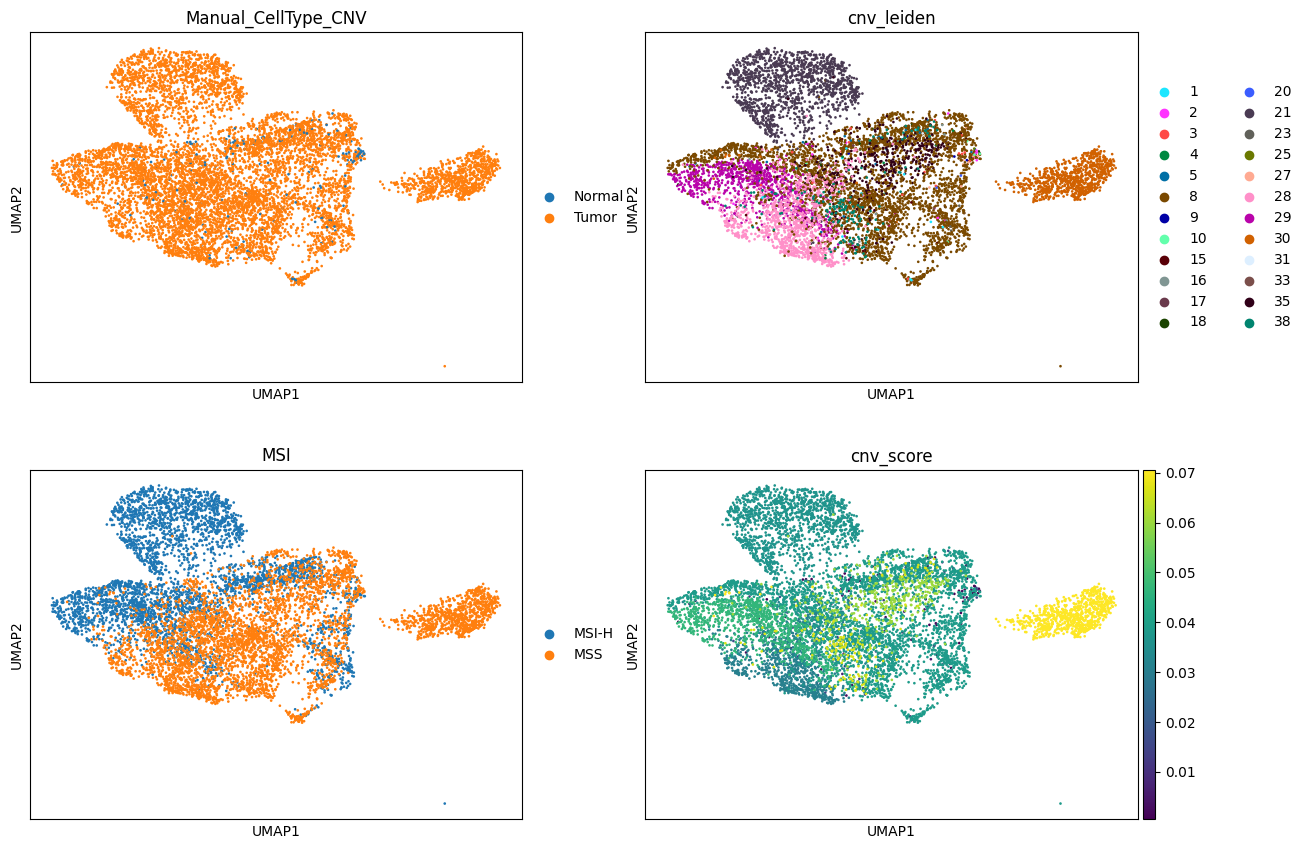

In [133]:
sc.pl.umap(adata[adata.obs['Author_CellType_lvl_1']=='Epithelial'], 
           color=['Manual_CellType_CNV', 'cnv_leiden', 'MSI', ], ncols=2)

In [80]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata)

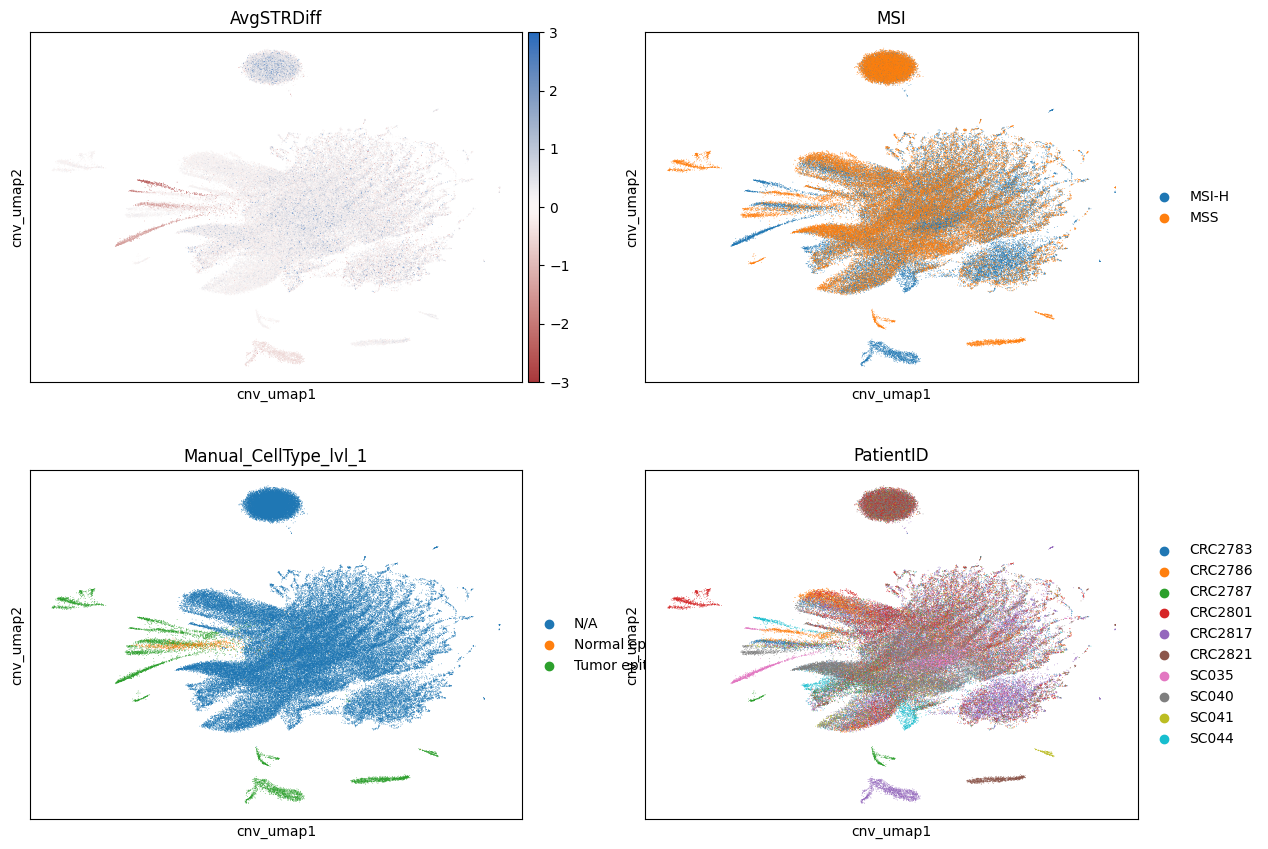

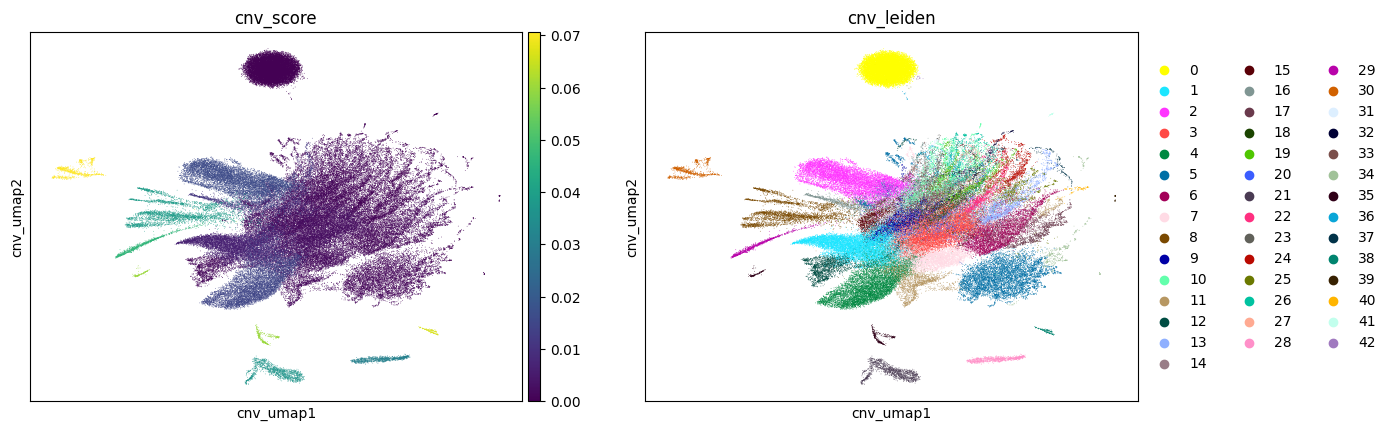

In [101]:
cnv.pl.umap(adata, color=["AvgSTRDiff", "MSI", "Manual_CellType_lvl_1", "PatientID", ], ncols=2, vmin=-3, vmax=3, cmap='vlag_r')
cnv.pl.umap(adata, color=["cnv_score", "cnv_leiden"], ncols=2,)

In [83]:
adata_epi_cnv = adata[adata.obs['Author_CellType_lvl_1']=='Epithelial'].copy()

In [84]:
cnv.tl.umap(adata_epi_cnv)
cnv.tl.cnv_score(adata_epi_cnv)

In [92]:
adata_epi_cnv.obs.columns

Index(['doublet_score', 'predicted_doublet', 'SampleID', 'PatientID',
       'BiopsySite', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'Identifier',
       'Author_CellType_lvl_1', 'Author_CellType_lvl_2', 'n_genes', 'leiden',
       'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci', 'MSI',
       'Manual_CellType_lvl_1', 'cnv_leiden', 'cnv_score'],
      dtype='object')

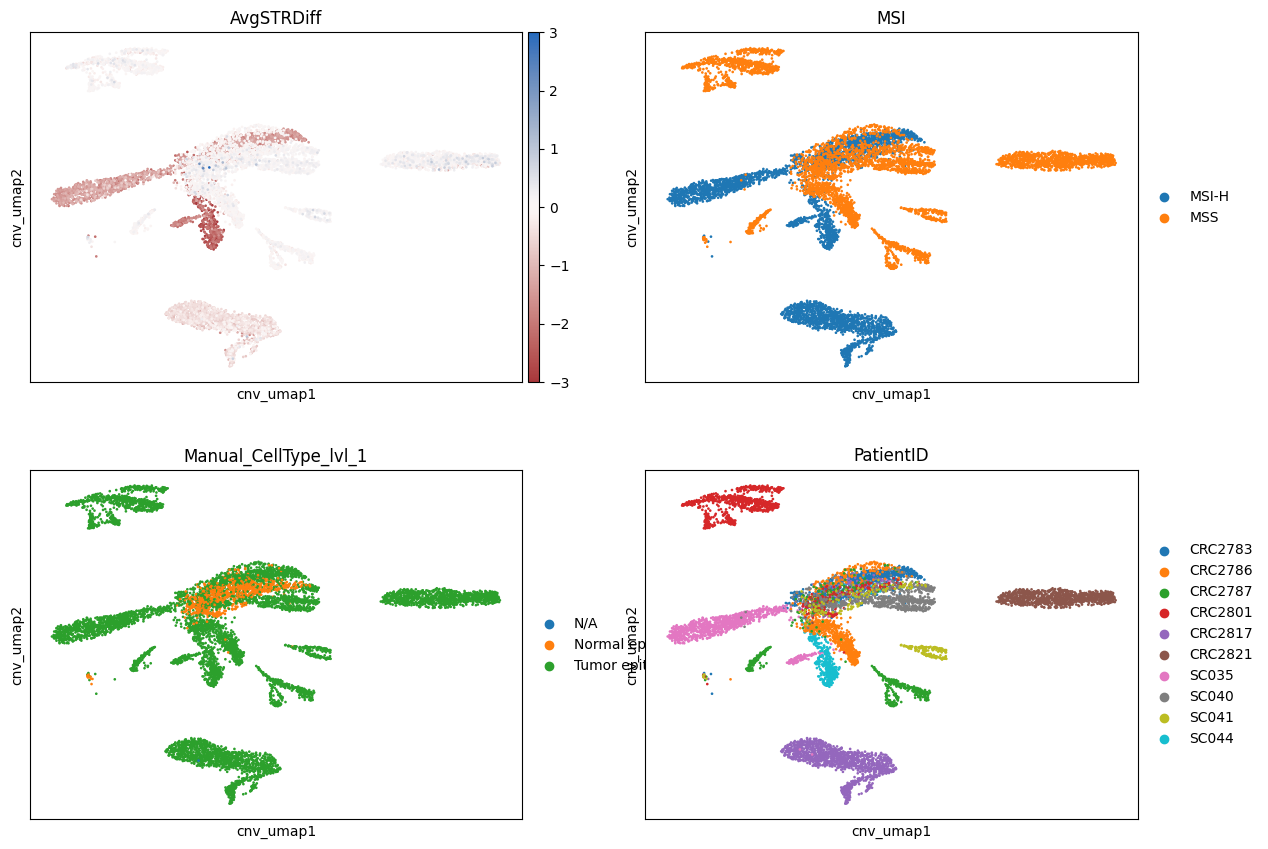

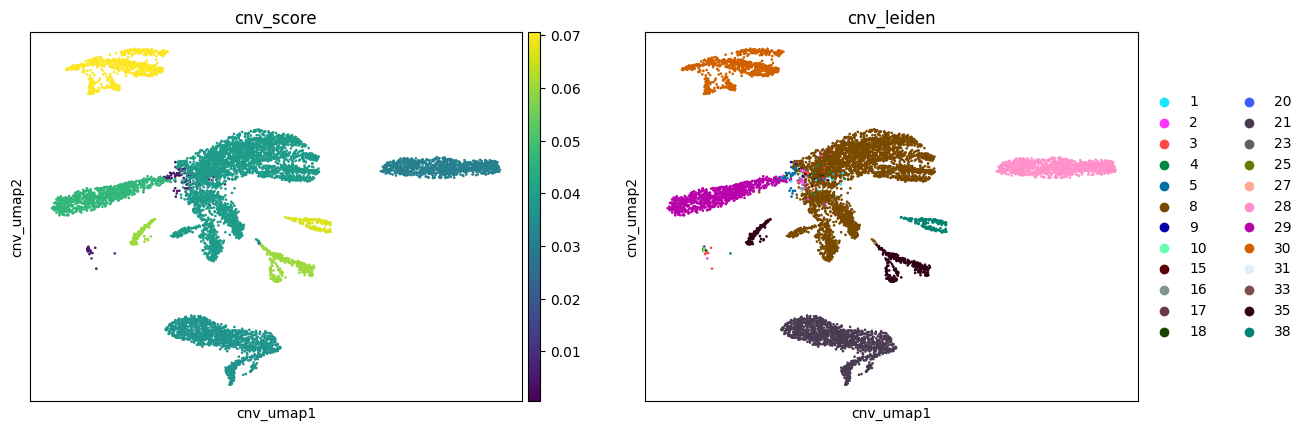

In [100]:
cnv.pl.umap(adata_epi_cnv, color=["AvgSTRDiff", "MSI", "Manual_CellType_lvl_1", "PatientID", ], ncols=2, vmin=-3, vmax=3, cmap='vlag_r')
cnv.pl.umap(adata_epi_cnv, color=["cnv_score", "cnv_leiden"], ncols=2,)

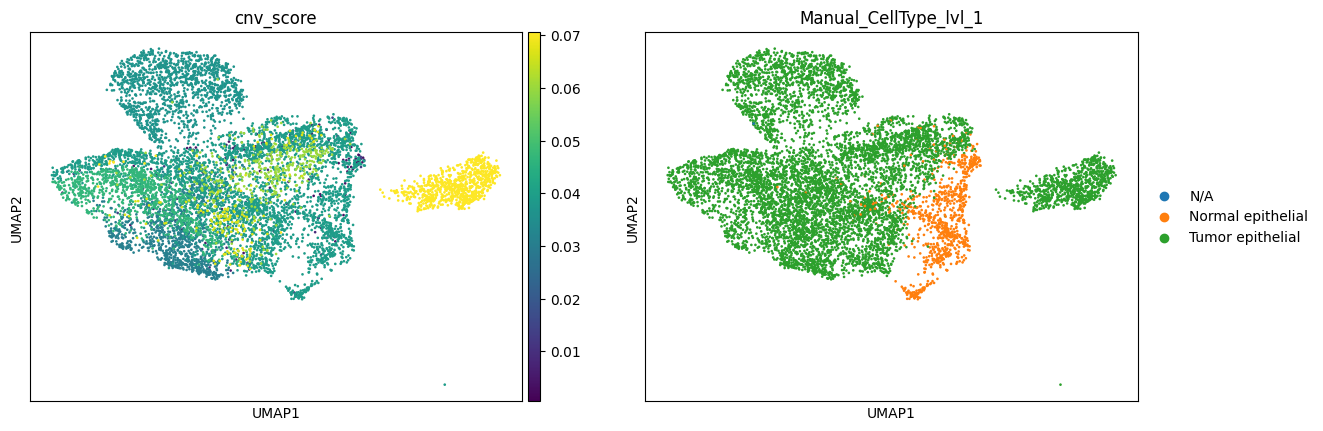

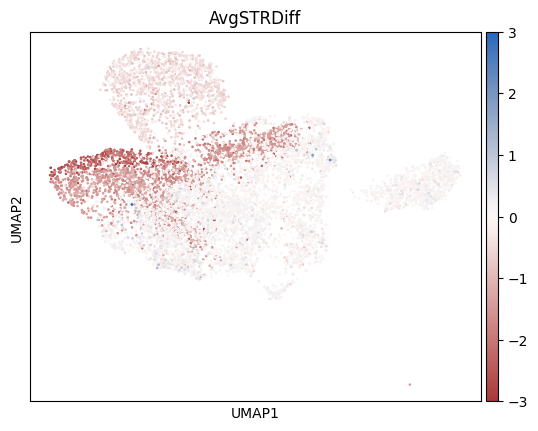

In [107]:
sc.pl.umap(adata_epi_cnv, color=['cnv_score', 'Manual_CellType_lvl_1',])
sc.pl.umap(adata_epi_cnv, color=['AvgSTRDiff'], vmin=-3, vmax=3, cmap='vlag_r')